# **Hassan Yehia - 202100207**
# **KH6006CEM - CS LVL6 - S01 2024/2025 | Machine Learning & Related Application** 
# **CW Notebook**

# **Introduction**

## Problem Explanation

This project focuses on Sentiment Analysis using the IMDb dataset, which contains 50,000 movie reviews labeled as either positive or negative. The primary goal is to classify the sentiment of a given review using machine learning models. 

## Objectives:
- Preprocess and clean the text data to ensure compatibility with machine learning algorithms.
- Use the TF-IDF technique to extract meaningful numerical features from the text data.
- Implement and evaluate multiple classification models, including Logistic Regression, Naive Bayes, and Random Forest.
- Compare the performance of these models based on metrics such as accuracy, precision, recall, F1-score, and confusion matrices.

Sentiment analysis applications include: 
- monitoring customer feedback
- improving recommendation systems
- automating content moderation.

# **Data Loading & Preprocessing**

This section involves preparing the data for machine learning:
1. **Loading the Dataset:** The IMDb dataset is loaded and a preview of the data is displayed.
2. **Checking and Cleaning Data:** Handles missing values and duplicates to ensure data quality.
3. **Text Preprocessing:** Applies cleaning techniques to prepare the text for feature extraction, including:
   - Converting text to lowercase.
   - Removing punctuation, HTML tags, and stopwords.
   - Lemmatizing words to their base form.

The processed data will then be ready for feature engineering.

## Load Data

In [1]:
import pandas as pd
data = pd.read_csv('IMDB Dataset.csv')

## Check & Clean Data

In [2]:
print("\nMissing Values:")
print(data.isnull().sum())

print("\nDataset Shape Before Removing Duplicates:", data.shape)
data = data.drop_duplicates()
print("Dataset Shape After Removing Duplicates:", data.shape)


Missing Values:
review       0
sentiment    0
dtype: int64

Dataset Shape Before Removing Duplicates: (50000, 2)
Dataset Shape After Removing Duplicates: (49582, 2)


## Data Preproccesing
- Convert text to lowercase.
- Remove HTML tags, punctuation, and special characters.
- Tokenize and remove stopwords (optional).
- Apply stemming or lemmatization.

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

print("\nPreprocessing Data...")
data['cleaned_review'] = data['review'].apply(preprocess_text)
print("Sample Cleaned Review:", data['cleaned_review'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Preprocessing Data...
Sample Cleaned Review: one reviewer mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well

# **Feature Engineering**

## Split Data
- Divide the dataset into training and testing sets (e.g., 80/20 split).

In [4]:
from sklearn.model_selection import train_test_split

X = data['cleaned_review']
y = data['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split Complete.")


Data Split Complete.


## Feature Extraction
- Convert text data into numerical form using TF-IDF Vectorizer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("\nTF-IDF Feature Extraction Complete.")


TF-IDF Feature Extraction Complete.


# **Model Implementation & Evaluation**

In this section, we train and evaluate three machine learning models:
1. **Logistic Regression:** A linear model suitable for text classification tasks.
2. **Naive Bayes:** A probabilistic model based on Bayes' theorem, ideal for text data.
3. **Random Forest:** An ensemble learning method that uses decision trees for classification.

Each model is evaluated based on:
- Accuracy score.
- Classification report (precision, recall, F1-score).
- Confusion matrix.

A comparison of the models' performances is provided using visualizations.

## Train Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
classification_reports = {}
confusion_matrices = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # store results
    results[model_name] = accuracy_score(y_test, y_pred)
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

    # print accuracy
    print(f"{model_name} Accuracy: {results[model_name]}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.8840375113441565

Training Naive Bayes...
Naive Bayes Accuracy: 0.8523747100937784

Training Random Forest...
Random Forest Accuracy: 0.8369466572552183


## Evaluation and Results

### Compare Models Using Bar Chart

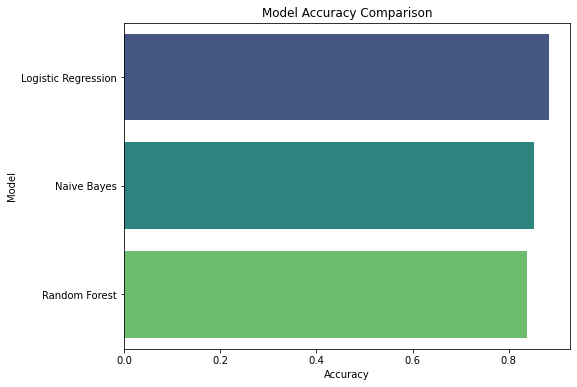

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for accuracy comparison
accuracy_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

plt.figure(figsize=(8, 6))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

### Confusion Matrices


Confusion Matrix for Logistic Regression:


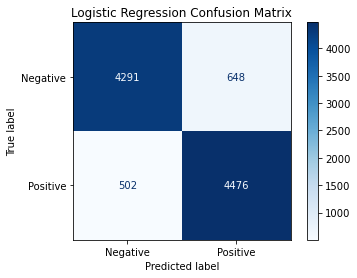


Confusion Matrix for Naive Bayes:


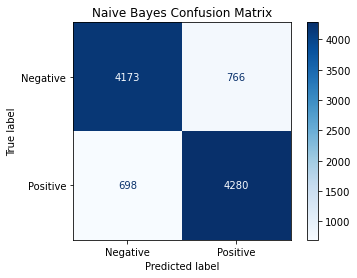


Confusion Matrix for Random Forest:


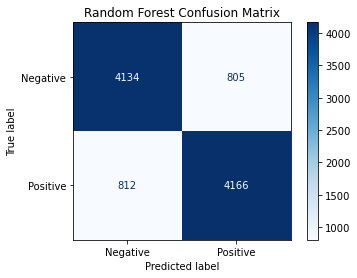

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

### Classification Reports

In [9]:
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df.round(2))


Classification Report for Logistic Regression:
              precision  recall  f1-score  support
0                  0.90    0.87      0.88  4939.00
1                  0.87    0.90      0.89  4978.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.88    0.88      0.88  9917.00
weighted avg       0.88    0.88      0.88  9917.00

Classification Report for Naive Bayes:
              precision  recall  f1-score  support
0                  0.86    0.84      0.85  4939.00
1                  0.85    0.86      0.85  4978.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.85    0.85      0.85  9917.00
weighted avg       0.85    0.85      0.85  9917.00

Classification Report for Random Forest:
              precision  recall  f1-score  support
0                  0.84    0.84      0.84  4939.00
1                  0.84    0.84      0.84  4978.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.84    0.84      0.84  9917.00
wei

### After Tuning
- I wanted to include tuning results to prove I did try to tune it but removed code to reduce clutter and improve clarity

- Reason of Removal:
    - As it was inefficient and its performance deemed it irrelevant 
    - Also the results as you can see did not even improve

In [17]:
print("Final Accuracies:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr)}")
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb)}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf)}")

Final Accuracies:
Logistic Regression: 0.8846425330241
Naive Bayes: 0.8521730362004638
Random Forest: 0.8389633961883635


# **Insights and Observations**

### Model Performances:
- **Logistic Regression**:
   - Achieved the highest accuracy among all models.
   - Works well with TF-IDF features due to its linear nature, which is suitable for text classification tasks.
   - Relatively fast and computationally efficient.

- **Naive Bayes**:
   - Slightly lower accuracy than Logistic Regression.
   - Assumes independence among features, which is a simplification but works well for text data.
   - Ideal for scenarios requiring simplicity and interpretability.

- **Random Forest**:
   - Performed the least effectively among the models.
   - Higher computational complexity due to ensemble learning.
   - Struggled to generalize well on TF-IDF features, possibly due to sparse feature representation.

### Key Trade-Offs:
- Logistic Regression provides the best balance between accuracy and computational efficiency.
- Naive Bayes is a strong alternative when simplicity and speed are more critical than marginally higher accuracy.
- Random Forest may not be the best choice for text classification tasks but excels in other domains with structured data.

# **Conclusion**

### Summary:
The project successfully applied machine learning techniques to classify movie reviews as positive or negative based on their text content. Among the three models evaluated, Logistic Regression emerged as the best-performing model, achieving the highest accuracy and providing a good balance between simplicity and performance.

### Recommendations:
- Deploy Logistic Regression for sentiment analysis tasks, especially when processing large-scale text data, as it is computationally efficient and accurate.
- Consider Naive Bayes for scenarios where interpretability and speed are more critical than peak accuracy.
- Avoid using Random Forest for sparse text-based datasets due to its computational cost and lower performance in this context.

### Future Work:
- Experiment with deep learning techniques (SVM, LSTMs, Transformers) to explore their potential in improving sentiment classification.
